In [1]:

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import warnings
import sklearn

from scipy.stats import uniform, loguniform

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
 

from IPython.display import display
from IPython.display import HTML
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute._base import SimpleImputer as Imputer 
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
   
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

In [2]:
score_obj = 'f1'

In [3]:
import pickle5 as pickle
with open("HT_train.pkl", "rb") as fh:
    df_train = pickle.load(fh)

#df_train = pd.read_pickle("HT_train.pkl")  

df_train, df_valid = train_test_split( df_train,  
                                          train_size = .9, 
                                          test_size = .1)

In [4]:
Z_train = df_train.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_train = df_train['Hypertensive']

Z_valid = df_valid.drop(['HyperSystolic','HyperDiastolic','Hypertensive'], axis = 1)
w_valid = df_valid['Hypertensive']


### Features for the model:

In [5]:

print('The features for our hypertension model are as follows:\n')
print(', '.join(Z_train.columns))
print('\nThe dimensions of the hypertension training set are ', Z_train.shape)
print('\nThe dimensions of the hypertension validation set are ', Z_valid.shape)

The features for our hypertension model are as follows:

Age, Education, Gender, HHIncome, Alcohol, HyperHist, CholHist, ChestPain, Shortness, DiabHist, Frozen, FastFood, ReadytoEat, MealsOut, Milk, KidneyStones, WeakKidneys, UrineLeak, FeltBad, HoursWorked, Dental, Pesticides, ModRec, WalkBike, VigRec, ModWork, VigWork, PregnantEver, PregnantNow, HoursSlept, Smoke100, SmokeNow, Pulse, Weight, ArmCirc, BMI, LegLen, ArmLen, Waist, FoodFastHours, SessionTime, MaxWeightRatio, DiabAgeYoung, DiabAgeOld, MexAm, Hisp, White, Black

The dimensions of the hypertension training set are  (24670, 48)

The dimensions of the hypertension validation set are  (2742, 48)


### Parameter search for several models



Decision Tree Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72     14729
         1.0       0.59      0.68      0.63      9941

    accuracy                           0.68     24670
   macro avg       0.67      0.68      0.67     24670
weighted avg       0.69      0.68      0.68     24670

Decision Tree Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      1621
         1.0       0.58      0.66      0.62      1121

    accuracy                           0.67      2742
   macro avg       0.66      0.67      0.66      2742
weighted avg       0.68      0.67      0.67      2742



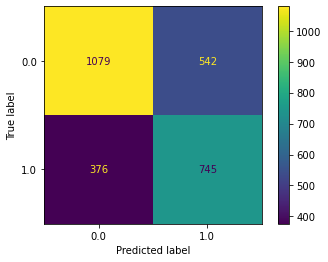

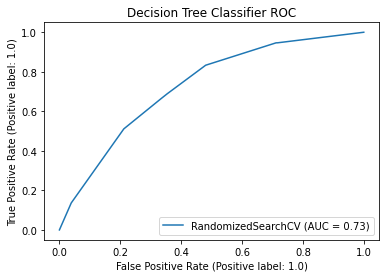

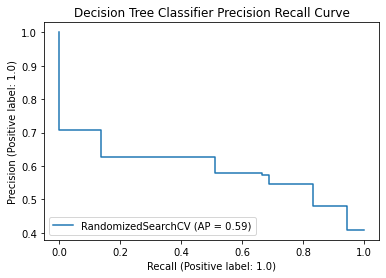

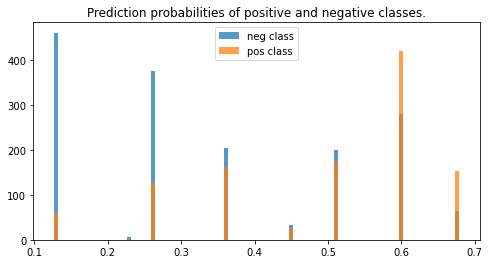







Random Forest Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     14729
         1.0       0.93      0.81      0.87      9941

    accuracy                           0.90     24670
   macro avg       0.91      0.89      0.89     24670
weighted avg       0.90      0.90      0.90     24670

Random Forest Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74      1621
         1.0       0.62      0.57      0.60      1121

    accuracy                           0.68      2742
   macro avg       0.67      0.67      0.67      2742
weighted avg       0.68      0.68      0.68      2742



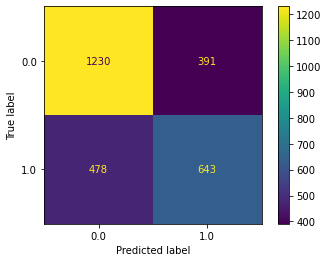

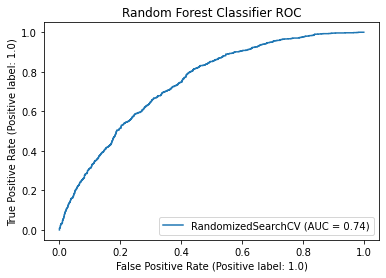

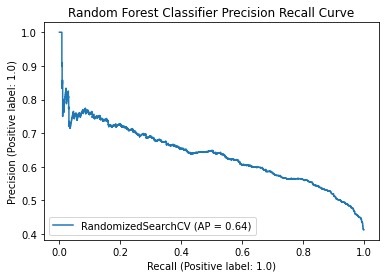

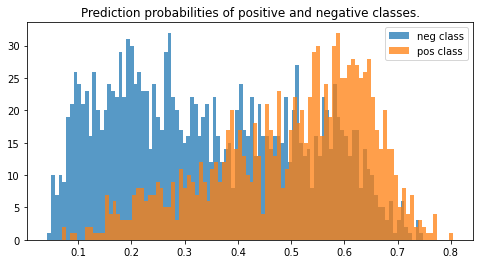







Gradient Boosting Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75     14729
         1.0       0.63      0.59      0.61      9941

    accuracy                           0.69     24670
   macro avg       0.68      0.68      0.68     24670
weighted avg       0.69      0.69      0.69     24670

Gradient Boosting Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74      1621
         1.0       0.63      0.58      0.60      1121

    accuracy                           0.69      2742
   macro avg       0.68      0.67      0.67      2742
weighted avg       0.68      0.69      0.69      2742



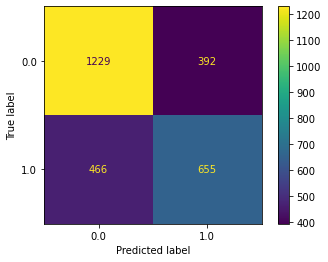

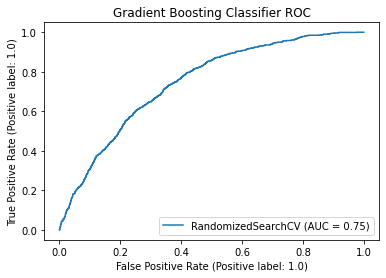

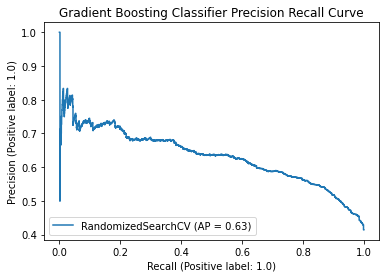

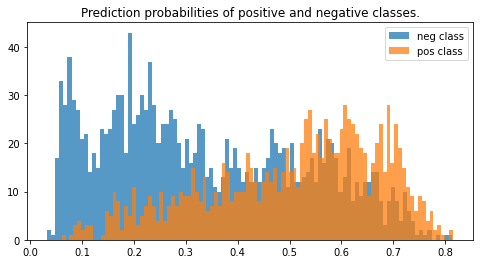







Logistic Regression Train Set Report
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75     14729
         1.0       0.63      0.52      0.57      9941

    accuracy                           0.68     24670
   macro avg       0.67      0.66      0.66     24670
weighted avg       0.68      0.68      0.68     24670

Logistic Regression Validation Set Report
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74      1621
         1.0       0.63      0.52      0.57      1121

    accuracy                           0.68      2742
   macro avg       0.67      0.65      0.66      2742
weighted avg       0.67      0.68      0.67      2742



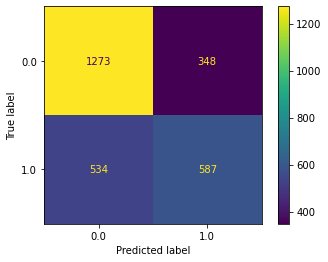

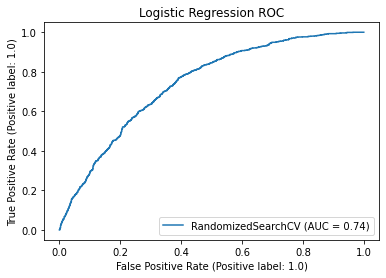

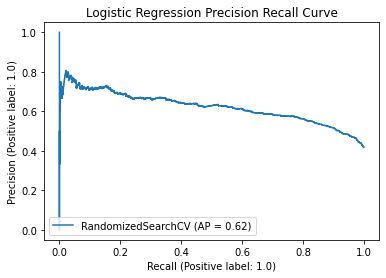

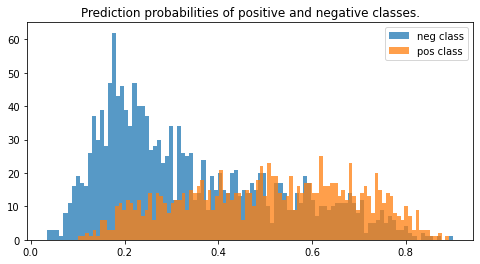







Support Vector (rbf kernel) Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75     14729
         1.0       0.63      0.60      0.61      9941

    accuracy                           0.70     24670
   macro avg       0.69      0.68      0.68     24670
weighted avg       0.70      0.70      0.70     24670

Support Vector (rbf kernel) Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74      1621
         1.0       0.62      0.57      0.59      1121

    accuracy                           0.68      2742
   macro avg       0.67      0.66      0.67      2742
weighted avg       0.68      0.68      0.68      2742



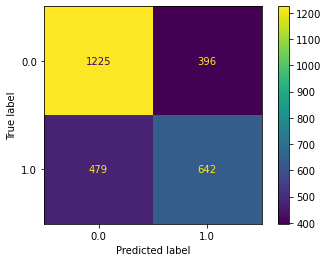

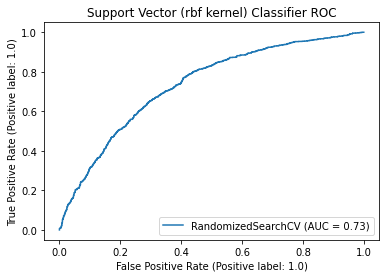

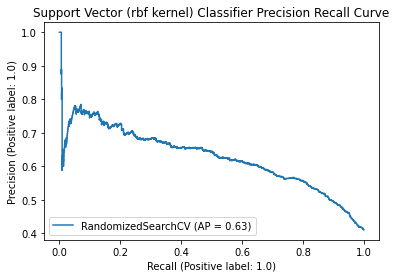







XGB Classifier Train Set Report
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75     14729
         1.0       0.63      0.62      0.63      9941

    accuracy                           0.70     24670
   macro avg       0.69      0.69      0.69     24670
weighted avg       0.70      0.70      0.70     24670

XGB Classifier Validation Set Report
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73      1621
         1.0       0.62      0.60      0.61      1121

    accuracy                           0.68      2742
   macro avg       0.67      0.67      0.67      2742
weighted avg       0.68      0.68      0.68      2742



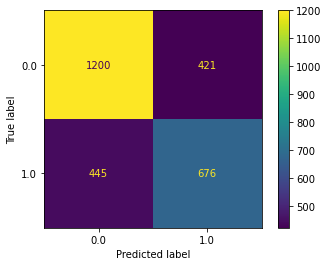

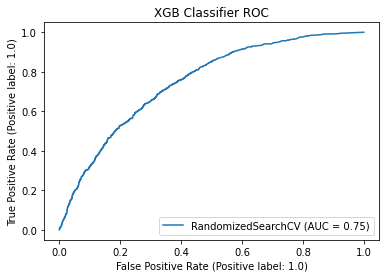

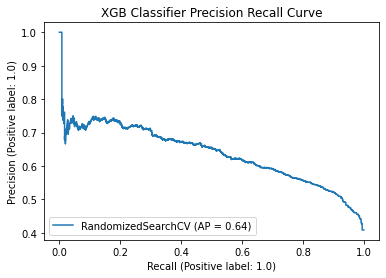

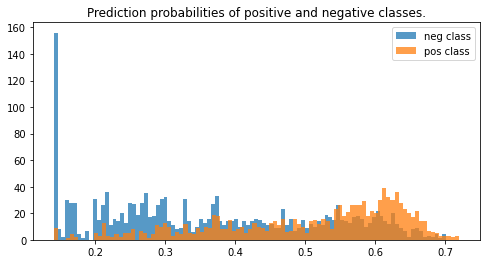

In [6]:

models = {
    'Decision Tree Classifier':{
        'algo': DecisionTreeClassifier(), 
        'n_search':20,
        'grid': {'decisiontreeclassifier__max_depth':list(range(1,30))}
    },
    'Random Forest Classifier':{
        'algo': RandomForestClassifier(), 
        'n_search':20,
        'grid': {'randomforestclassifier__max_depth':list(range(1,20)),
               'randomforestclassifier__n_estimators':list(range(50,250,25)),
                'randomforestclassifier__criterion':['gini','entropy']}
    },
    'Gradient Boosting Classifier':{
        'algo': GradientBoostingClassifier(),  
        'n_search':20,
        'grid':  {'gradientboostingclassifier__max_depth': list(range(1,20)), 
               'gradientboostingclassifier__n_estimators': list(range(50,250,25)),
               'gradientboostingclassifier__loss': ['deviance','exponential']}
    },
    'Logistic Regression':{
        'algo': LogisticRegression(), 
        'n_search':20,
        'grid':{'logisticregression__C': loguniform(1e-2 , 1e2) }
    },
    'Support Vector (rbf kernel) Classifier':{
        'algo': SVC(kernel = 'rbf'), 
        'n_search':20,
        'grid': { 'svc__gamma': loguniform(1e-4, 1e0),
               'svc__C': loguniform(1, 1e3)} 
    }, 
    'XGB Classifier':{
        'algo': XGBClassifier(use_label_encoder=False,eval_metric = 'logloss'),  
        'n_search': 40,
        'grid': {'xgbclassifier__eta': loguniform(1e-2, 1e0), 
              'xgbclassifier__gamma': loguniform(1e-8 , 1e-2),
              'xgbclassifier__lambda': loguniform(1e-2 , 1e1),
              'xgbclassifier__alpha': loguniform(1e-8 , 1e-4),
              'xgbclassifier__max_depth': [3,4,5,6,7,8]} 
    }
}

for name, model in models.items():
    
    algorithm = model['algo']
    n_search = model['n_search']
    grid_params = model['grid'] 
       
    pipeline = make_pipeline( MinMaxScaler(),algorithm )
    
    model_grid = RandomizedSearchCV(pipeline,grid_params, 
                                    cv = 5, n_jobs = 1, 
                                    scoring = score_obj, n_iter=n_search)
    
    model_grid.fit(Z_train, w_train)
    model['trained'] = model_grid
    
    print('\n')
    
    HTML('<font size = 7>'+name+'</font>')
    
    w_train_pred = model_grid.predict(Z_train)
    print(name, 'Train Set Report')
    print(classification_report(w_train, w_train_pred))
    
    w_valid_pred = model_grid.predict(Z_valid)
    print(name, 'Validation Set Report')
    print(classification_report(w_valid, w_valid_pred))
  

    
    plot_confusion_matrix(model_grid, Z_valid, w_valid)
    plt.show()
    
    metrics.plot_roc_curve(model_grid,Z_valid,w_valid)
    title = name + ' ROC'
    plt.title(title)
    plt.show()
    
    metrics.plot_precision_recall_curve(model_grid,Z_valid,w_valid)
    title = name + ' Precision Recall Curve'
    plt.title(title)
    plt.show()
    
 
    try: 
        w_pred = model_grid.predict_proba(Z_valid)[:, 1]
        plt.figure(figsize=(8,4))
        plt.hist(w_pred[np.where(w_valid == 0)], bins=100, alpha=0.75, label='neg class')
        plt.hist(w_pred[np.where(w_valid == 1)], bins=100, alpha=0.75, label='pos class')
        plt.legend()
        plt.title('Prediction probabilities of positive and negative classes.')
        plt.show()
    except:
        pass
         
    model['f1_score'] = f1_score(w_valid,w_valid_pred)
    model['Best Parameters'] = model_grid.best_params_
    
    
    print('\n'*3)
    
    

### Top Models

In [7]:
f1_dict = {name:models[name]['f1_score'] for name in models}
from collections import Counter
best_models = [x[0] for x in Counter(f1_dict).most_common(3)]
best_models = {x: models[x] for x in best_models }
 
for name, model in best_models.items():
    print(f'Model: {name}')
    print(f"f1 score: {model['f1_score']}")
    print('Parameters:')
    for parameter, value in model['Best Parameters'].items():
        print(f"{parameter.split('__')[1]}: {value}")
    print('\n'*2)

Model: Decision Tree Classifier
f1 score: 0.6187707641196014
Parameters:
max_depth: 3



Model: XGB Classifier
f1 score: 0.6095581605049594
Parameters:
alpha: 1.0617554762289486e-08
eta: 0.01730259569816913
gamma: 0.003230715173481099
lambda: 0.030449732224152017
max_depth: 5



Model: Gradient Boosting Classifier
f1 score: 0.6042435424354243
Parameters:
n_estimators: 150
max_depth: 2
loss: exponential





### Stacked model predictor

In [ ]:
estimators = [
    ('rf', GradientBoostingClassifier(max_depth = 7, n_estimators = 125)),
    ('svc_rbf',make_pipeline( MinMaxScaler(),SVC(kernel = 'rbf',C = 10,gamma = 1e-3))),
    ('svc_poly',make_pipeline( MinMaxScaler(),SVC(kernel = 'poly',C = 2)))
]
stack = StackingClassifier(estimators=estimators,
                          final_estimator = LogisticRegression())
stack.fit(Z_train, w_train)

w_train_pred = stack.predict(Z_train)
print('Stacking Classifier Train Report')
print(classification_report(w_train, w_train_pred))
w_valid_pred = stack.predict(Z_valid)
print('Stacking Classifier Validation Report')
print(classification_report(w_valid, w_valid_pred))
        
print(f'The f1 score on the validation set  is { f1_score(w_valid,w_valid_pred):.4f}')    
        
plot_confusion_matrix(stack, Z_valid, w_valid)
plt.show()
    
metrics.plot_roc_curve(stack,Z_valid,w_valid)
title = name + ' ROC'
plt.title(title)
plt.show()